In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

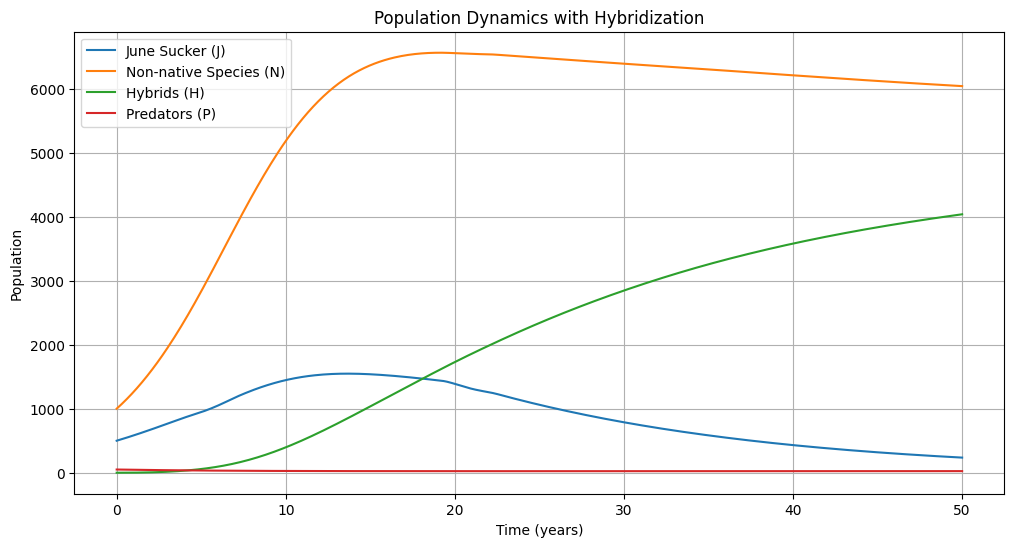

In [2]:
# Model parameters
r_J = 0.2
r_N = 0.3
r_H = 0.25
K_0 = 10000
c_JN = c_NJ = 1.0
c_JH = c_NH = c_HJ = c_HN = 0.9
beta_J = beta_N = beta_H = 5e-5
s_H = 1e-5
s_P = 1e-5
m_P = 0.1
gamma = 0.5

# Human intervention functions
def H_J(t):
    return 50 if 5 <= t <= 20 else 0

def H_N(t):
    return -10

def H_H(t):
    return -5

# Carrying capacity function
def K(t):
    return K_0 + gamma * H_J(t)

# ODE system
def ecosystem_model(t, y):
    J, N, H, P = y
    dJdt = r_J * J * (1 - (J + c_JN * N + c_JH * H) / K(t)) - beta_J * J * P - s_H * J * N + H_J(t)
    dNdt = r_N * N * (1 - (N + c_NJ * J + c_NH * H) / K(t)) - beta_N * N * P - s_H * J * N + H_N(t)
    dHdt = s_H * J * N + r_H * H * (1 - (H + c_HJ * J + c_HN * N) / K(t)) - beta_H * H * P + H_H(t)
    dPdt = s_P * (J + N + H) * P - m_P * P
    return [dJdt, dNdt, dHdt, dPdt]

# Time span and initial conditions
t_span = (0, 50)
t_eval = np.linspace(*t_span, 500)
initial_conditions = [500, 1000, 0, 50]

# Solving the ODE system
solution = solve_ivp(ecosystem_model, t_span, initial_conditions, t_eval=t_eval)

# Extracting results
J_t, N_t, H_t, P_t = solution.y

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(solution.t, J_t, label='June Sucker (J)')
plt.plot(solution.t, N_t, label='Non-native Species (N)')
plt.plot(solution.t, H_t, label='Hybrids (H)')
plt.plot(solution.t, P_t, label='Predators (P)')
plt.title('Population Dynamics with Hybridization')
plt.xlabel('Time (years)')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()